# A Predictive Approach to Reducing Post-Harvest Losses While Minimizing Pesticides Dependency in Rwanda; Model Training


The dataset used in this phase of the research is a result of research conducted to identify different implications of storage technologies and environmental conditions on the storage of Maize grains to reduce PHL. The experiment was conducted  in controlled and uncontrolled (on-farm storage) environments. The resulting datasets were explored and augmented to match the research purpose.

*More info in the paper: https://www.sciencedirect.com/science/article/pii/S0022474X20302344?via%3Dihub*

*Link to data: https://data.mendeley.com/datasets/fmtgzw5mmp/1*

## Importing Libraries

In [1]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the necessary Libraries
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## Loading The datasets

In [3]:
# Loading the controlled environment results as df1
df1 = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Data/data_controlled.xlsx')

In [4]:
# Loading th =e uncontrolled environment results as df2
df2 = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Data/data_noncontrolled.xlsx')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              266 non-null    int64  
 1   Site of experiment                              266 non-null    object 
 2   Municipality                                    266 non-null    object 
 3   State                                           266 non-null    object 
 4   Elevation (m asl)                               266 non-null    int64  
 5   Climate                                         266 non-null    object 
 6   Year                                            266 non-null    int64  
 7   Storage technology                              266 non-null    object 
 8   Tmin (°C)                                       266 non-null    float64
 9   Tmax (°C)                                  

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              438 non-null    int64  
 1   Site of experiment                              438 non-null    object 
 2   Municipality                                    438 non-null    object 
 3   State                                           438 non-null    object 
 4   Elevation (m asl)                               438 non-null    float64
 5   Storage technology                              438 non-null    object 
 6   Tmin (°C)                                       438 non-null    float64
 7   Tmax (°C)                                       438 non-null    float64
 8   Hrmin (%)                                       438 non-null    float64
 9   Hrmax (%)                                  

## Processing The datasets To meet the Needed Research Items

In [7]:
# Visualizing the structure od df2
df2.head()

,ID,Site of experiment,Municipality,State,Elevation (m asl),Storage technology,Tmin (°C),Tmax (°C),Hrmin (%),Hrmax (%),...,final grain temperature (°C),final percentage of insect-damaged grain (%),final percentage of fungi-damaged grain (%),final total damage (%),initial number of live maize weevils,initial number of live large grain borers,initial number of live Angoumois grain moths,final number of live maize weevils,final number of live large grain borers,final number of live Angoumois grain moths
0,1,"Amealco, QTO",Amealco,Querétaro,2592.0,HBZ,7.748421,19.571579,43.157895,92.568421,...,13.5,0.4,2.0,3.0,0,0,2,0,0,0
1,1,"Amealco, QTO",Amealco,Querétaro,2592.0,PP,7.748421,19.571579,43.157895,92.568421,...,13.1,4.0,2.4,6.6,0,0,2,0,0,5
2,1,"Amealco, QTO",Amealco,Querétaro,2592.0,HMS,7.748421,19.571579,43.157895,92.568421,...,13.2,0.2,1.6,2.4,0,0,2,0,0,0
3,2,"Cadereyta, QTO",Cadereyta,Querétaro,2048.0,HBZ,8.553968,19.741270,43.111111,95.079365,...,16.3,0.0,1.6,1.6,0,0,0,0,0,0
4,2,"Cadereyta, QTO",Cadereyta,Querétaro,2048.0,PP,8.553968,19.741270,43.111111,95.079365,...,16.2,0.4,1.6,2.0,0,0,0,0,0,2


In [8]:
# Dropping the unwanted columns
df2.drop(columns=[
    'ID',
    'Site of experiment',
    'Municipality',
    'State',
    'Elevation (m asl)',
    'Tmin (°C)',
    'Hrmax (%)',
    'Year',
    'Storage time (months)',
    'initial grain moisture content (%)',
    'initial grain temperature (°C)',
    'initial percentage of insect-damaged grain (%)',
    'initial percentage of fungi-damaged grain (%)',
    'final grain moisture content (%)',
    'final grain temperature (°C)',
    'final percentage of insect-damaged grain (%)',
    'final percentage of fungi-damaged grain (%)',
    'initial number of live maize weevils',
    'initial number of live large grain borers',
    'initial number of live Angoumois grain moths ',
    'final number of live maize weevils',
    'final number of live large grain borers',
    'final number of live Angoumois grain moths',
    ], inplace=True)

In [9]:
# Visualizing the new structure
df2.head()

,Storage technology,Tmax (°C),Hrmin (%),Variety,Storage time (days),Grain Impurities (%),Initial total damage (%),final total damage (%)
0,HBZ,19.571579,43.157895,Native,94,6.066667,4.0,3.0
1,PP,19.571579,43.157895,Native,94,6.066667,4.0,6.6
2,HMS,19.571579,43.157895,Native,94,6.066667,4.0,2.4
3,HBZ,19.741270,43.111111,Native,62,0.400000,1.6,1.6
4,PP,19.741270,43.111111,Native,62,0.400000,1.6,2.0


In [10]:
# Visualizing the df1 structure
df1.head()

,ID,Site of experiment,Municipality,State,Elevation (m asl),Climate,Year,Storage technology,Tmin (°C),Tmax (°C),...,final percentage of insect-damaged grain (%),final percentage of fungi-damaged grain (%),Weight_Loss (%),final total damage (%),initial number of live maize weevils,initial number of live large grain borers,AGMI,LMWF,LLGBF,AGMF
0,1,"Texcoco, MEX",Texcoco de Mora,Estado de México,2282,Temperate,2017,polypropylene bag,8.308799,23.084865,...,0.100000,4.770000,0.039857,7.390000,0,0,0,0,0,0
1,1,"Texcoco, MEX",Texcoco de Mora,Estado de México,2282,Temperate,2017,polypropylene bag,8.308799,23.084865,...,0.380000,4.890000,0.106699,7.610000,0,0,0,0,2,0
2,1,"Texcoco, MEX",Texcoco de Mora,Estado de México,2282,Temperate,2017,polypropylene bag,8.308799,23.084865,...,0.020000,5.530000,0.015499,8.410000,0,0,0,0,0,0
3,1,"Texcoco, MEX",Texcoco de Mora,Estado de México,2282,Temperate,2017,hermetic metal silo,8.308799,23.084865,...,0.279972,4.369563,0.031627,6.779322,0,0,0,0,0,0
4,1,"Texcoco, MEX",Texcoco de Mora,Estado de México,2282,Temperate,2017,hermetic metal silo,8.308799,23.084865,...,0.110000,4.710000,0.029662,6.900000,0,0,0,0,0,0


In [11]:
# Dropping unwanted columns
df1.drop(columns=[
    'ID',
    'Site of experiment',
    'Municipality',
    'State',
    'Elevation (m asl)',
    'Tmin (°C)',
    'Hrmax  (%)',
    'Year',
    'Storage time (months)',
    'AGMI',
    'initial grain temperature (°C)',
    'initial percentage of insect-damaged grain (%)',
    'initial percentage of fungi-damaged grain (%)',
    'final grain moisture content (%)',
    'final grain temperature (°C)',
    'final percentage of insect-damaged grain (%)',
    'final percentage of fungi-damaged grain (%)',
    'initial number of live maize weevils',
    'initial number of live large grain borers',
    'AGMI',
    'AGMF',
    'LLGBF',
    'LMWF',
    'Climate',
    'initial grain moisture content (%)',
    'Weight_Loss  (%)',
    ], inplace=True)

In [12]:
# Visualizing the new structure
df1.head()

,Storage technology,Tmax (°C),Hrmin (%),Variety,Storage time (days),Grain Impurities (%),Initial total damage (%),final total damage (%)
0,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,7.390000
1,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,7.610000
2,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,8.410000
3,hermetic metal silo,23.084865,30.877057,Hybrid,182,0.346642,9.682637,6.779322
4,hermetic metal silo,23.084865,30.877057,Hybrid,182,0.346642,9.682637,6.900000


## Concatenaring The Two Datasets To Form One Comprehensive Dataset

In [13]:
# Checking the column names for mismatches with df2
print(df1.columns)


Index(['Storage technology', 'Tmax (°C)', 'Hrmin  (%)', 'Variety',
       'Storage time (days)', 'Grain Impurities (%)',
       'Initial total damage (%)', 'final total damage  (%)'],
      dtype='object')


In [14]:
print(df2.columns)

Index(['Storage technology', 'Tmax (°C)', 'Hrmin (%)', 'Variety',
       'Storage time (days)', 'Grain Impurities (%)',
       'Initial total damage (%)', 'final total damage  (%)'],
      dtype='object')


In [15]:
# Aligning the column names to avoid conflicts while merging
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()
df1.rename(columns={'hrmin  (%)': 'hrmin (%)'}, inplace=True)

In [16]:
df1.head()

,storage technology,tmax (°c),hrmin (%),variety,storage time (days),grain impurities (%),initial total damage (%),final total damage (%)
0,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,7.390000
1,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,7.610000
2,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,8.410000
3,hermetic metal silo,23.084865,30.877057,Hybrid,182,0.346642,9.682637,6.779322
4,hermetic metal silo,23.084865,30.877057,Hybrid,182,0.346642,9.682637,6.900000


In [17]:
# Creating a dummy column to check for conflicts
df1["Environment"] = "Controlled"
df2["Environment"] = "Uncontrolled"

In [18]:
# Adding the two datasets
df_concat = pd.concat([df1, df2], axis=0, ignore_index=True)

In [19]:
df_concat.head()

,storage technology,tmax (°c),hrmin (%),variety,storage time (days),grain impurities (%),initial total damage (%),final total damage (%),Environment
0,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,7.390000,Controlled
1,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,7.610000,Controlled
2,polypropylene bag,23.084865,30.877057,Hybrid,182,0.346642,9.682637,8.410000,Controlled
3,hermetic metal silo,23.084865,30.877057,Hybrid,182,0.346642,9.682637,6.779322,Controlled
4,hermetic metal silo,23.084865,30.877057,Hybrid,182,0.346642,9.682637,6.900000,Controlled


In [20]:
'''
Checking instances identified where initial damaged grain is higher than
the final damaged grain, as a result of the methodology the experiment
used to test the results
'''

initial_col = 'initial total damage (%)'
final_col = 'final total damage  (%)'

# Creating a boolean mask
mask = df_concat[initial_col] > df_concat[final_col]

# Counting how many such rows exist
count = mask.sum()
total = len(df_concat)
percentage = (count / total) * 100

print(f"Rows where initial damage > final damage: {count} ({percentage:.2f}% of total)")

Rows where initial damage > final damage: 264 (37.50% of total)


In [21]:
# Removing the identified rows above since thay are bias and can affect model learning

df_clean = df_concat[~mask].copy()

# confirm new shape
print(f"After cleaning: {len(df_clean)} rows remain")

After cleaning: 440 rows remain


In [22]:
# Removing the abbreviations in storage method for easy readability

# Creating a dictionary to map abbreviations to full names
storage_mapping = {
    'PP': 'polypropylene bag',
    'PP_AP': 'polypropylene bag with aluminum phosphide',
    'PP_DM': 'polypropylene bag with deodorized malathion',
    'PP_ML': 'polypropylene bag with micronized lime',
    'PP_SL': 'polypropylene bag with standard lime',
    'PBA': 'plastic barrel',
    'PBO': 'plastic bottle',
    'SPB': 'silage plastic bag',
    'HBT': 'GrainPro Hermetic SuperGrainbag Farm',
    'HBZ': 'GrainPro hermetic SuperGrainbag Premium RZ with zip',
    'HMS': 'hermetic metal silo'
}

# Replacing abbreviations with full names
df_clean['storage technology'] = df_clean['storage technology'].replace(storage_mapping)

# Converting to lowercase
df_clean['storage technology'] = df_clean['storage technology'].str.lower()

# Removing special characters
df_clean['storage technology'] = df_clean['storage technology'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_clean['storage technology'] = df_clean['storage technology'] .str.replace(r'\s+', ' ', regex=True).str.strip()

# Displaying the unique values to confirm the changes
display(df_clean['storage technology'].unique())

array(['polypropylene bag with micronized lime', 'polypropylene bag',
       'hermetic metal silo', 'grainpro hermetic supergrainbag farm',
       'polypropylene bag with aluminum phosphide',
       'polypropylene bag with standard lime',
       'grainpro hermetic supergrainbag premium rz with zip',
       'plastic bottle', 'silage plastic bag', 'plastic barrel',
       'polypropylene bag with deodorized malathion'], dtype=object)

In [23]:
df_clean.head()

,storage technology,tmax (°c),hrmin (%),variety,storage time (days),grain impurities (%),initial total damage (%),final total damage (%),Environment
10,polypropylene bag with micronized lime,23.084865,30.877057,Hybrid,182,0.346642,9.682637,9.739026,Controlled
12,polypropylene bag,21.214812,39.311633,Hybrid,365,0.346642,9.682637,10.288971,Controlled
13,polypropylene bag,21.214812,39.311633,Hybrid,365,0.346642,9.682637,12.266320,Controlled
14,polypropylene bag,21.214812,39.311633,Hybrid,365,0.346642,9.682637,9.817055,Controlled
21,hermetic metal silo,24.841290,59.357604,Native,185,0.220000,11.062333,29.000000,Controlled


In [24]:
# Dropping the environment column dummy
df_clean.drop(columns=['Environment'], inplace=True)

In [25]:
df_clean.to_csv("cleaned_data.csv", index=False)

In [26]:
df_clean.columns

Index(['storage technology', 'tmax (°c)', 'hrmin (%)', 'variety',
       'storage time (days)', 'grain impurities (%)',
       'initial total damage (%)', 'final total damage  (%)'],
      dtype='object')

In [48]:
# Saving the cleaned datase
df_clean.to_csv("Capstone_dataset.csv", index=False)

## Exploring The Relevance Of The Remaining Features To the Target Variable, 'Final Total Damage'

In [27]:
# Performing one-hot encoding on the 'storage technology' and 'variety' columns to be able to calculate correlation
df_encoded = pd.get_dummies(df_clean, columns=['storage technology', 'variety'], prefix=['storage', 'variety'])

# Droping the original string columns
df_encoded = df_encoded.drop(columns=['storage technology', 'variety'], errors='ignore')


# Displaying the first few rows of the encoded DataFrame to show the new columns
display(df_encoded.head())

,tmax (°c),hrmin (%),storage time (days),grain impurities (%),initial total damage (%),final total damage (%),storage_grainpro hermetic supergrainbag farm,storage_grainpro hermetic supergrainbag premium rz with zip,storage_hermetic metal silo,storage_plastic barrel,storage_plastic bottle,storage_polypropylene bag,storage_polypropylene bag with aluminum phosphide,storage_polypropylene bag with deodorized malathion,storage_polypropylene bag with micronized lime,storage_polypropylene bag with standard lime,storage_silage plastic bag,variety_Hybrid,variety_Native
10,23.084865,30.877057,182,0.346642,9.682637,9.739026,False,False,False,False,False,False,False,False,True,False,False,True,False
12,21.214812,39.311633,365,0.346642,9.682637,10.288971,False,False,False,False,False,True,False,False,False,False,False,True,False
13,21.214812,39.311633,365,0.346642,9.682637,12.266320,False,False,False,False,False,True,False,False,False,False,False,True,False
14,21.214812,39.311633,365,0.346642,9.682637,9.817055,False,False,False,False,False,True,False,False,False,False,False,True,False
21,24.841290,59.357604,185,0.220000,11.062333,29.000000,False,False,True,False,False,False,False,False,False,False,False,False,True


In [49]:
# Saving the encoded strings dataset
df_encoded.to_csv("Capstone_dataset_encoded.csv", index=False)

In [28]:
# Calculating the correlation matrix
correlation_matrix = df_encoded.corr()

# Getting correlations with the target variable 'final total damage (%)'
target_correlation = correlation_matrix['final total damage  (%)'].sort_values(ascending=False)

# Printing the columns used for correlation
print("Columns used for correlation calculation:")
print(df_encoded.columns.tolist())


# Displaying the correlations
display(target_correlation)

Columns used for correlation calculation:
['tmax (°c)', 'hrmin (%)', 'storage time (days)', 'grain impurities (%)', 'initial total damage (%)', 'final total damage  (%)', 'storage_grainpro hermetic supergrainbag farm', 'storage_grainpro hermetic supergrainbag premium rz with zip', 'storage_hermetic metal silo', 'storage_plastic barrel', 'storage_plastic bottle', 'storage_polypropylene bag', 'storage_polypropylene bag with aluminum phosphide', 'storage_polypropylene bag with deodorized malathion', 'storage_polypropylene bag with micronized lime', 'storage_polypropylene bag with standard lime', 'storage_silage plastic bag', 'variety_Hybrid', 'variety_Native']


,final total damage (%)
final total damage (%),1.000000
storage_polypropylene bag,0.437963
storage time (days),0.193833
variety_Native,0.157466
initial total damage (%),0.157171
hrmin (%),0.140242
storage_polypropylene bag with aluminum phosphide,0.052557
storage_polypropylene bag with standard lime,0.010786
storage_polypropylene bag with micronized lime,-0.032040
tmax (°c),-0.032511


The Linear correlations show little relevance of the features to the target, which is expected given that crops spoilage is not influenced by a single factor, but numerous conditions that come together. Checking the non-linear relationship (correlation) of the features with the target is the right approach in this case.

In [29]:
# Separating features and target
X = df_encoded.drop('final total damage  (%)', axis=1)
y = df_encoded['final total damage  (%)']

# Calculate mutual information
# Using mutual_info_regression because the target variable is continuous
mutual_info = mutual_info_regression(X, y)

# Creating a pandas Series for better visualization
mutual_info = pd.Series(mutual_info, name="Mutual Information", index=X.columns)

# Sorting the mutual information values
mutual_info = mutual_info.sort_values(ascending=False)

# Display the mutual information scores
print("Mutual Information scores between features and 'final total damage (%)':")
display(mutual_info)

Mutual Information scores between features and 'final total damage (%)':


,Mutual Information
initial total damage (%),0.604766
hrmin (%),0.437119
tmax (°c),0.385118
grain impurities (%),0.348486
storage time (days),0.333583
variety_Hybrid,0.079338
variety_Native,0.079045
storage_polypropylene bag,0.057592
storage_polypropylene bag with standard lime,0.033012
storage_grainpro hermetic supergrainbag farm,0.031039


The non-linear correlation and mutual information analyses reveal that there are relationships between the features and the target variable that go beyond what linear measures capture. This aligns with the understanding that crop spoilage is influenced not by a single factor but by the complex interplay of multiple conditions that jointly determine the outcome. However, the relatively low mutual information values indicate that these relationships may still be weak, which could impact the predictive performance of the final model.

## Data Visualizations

In [30]:
target = 'final total damage (%)'

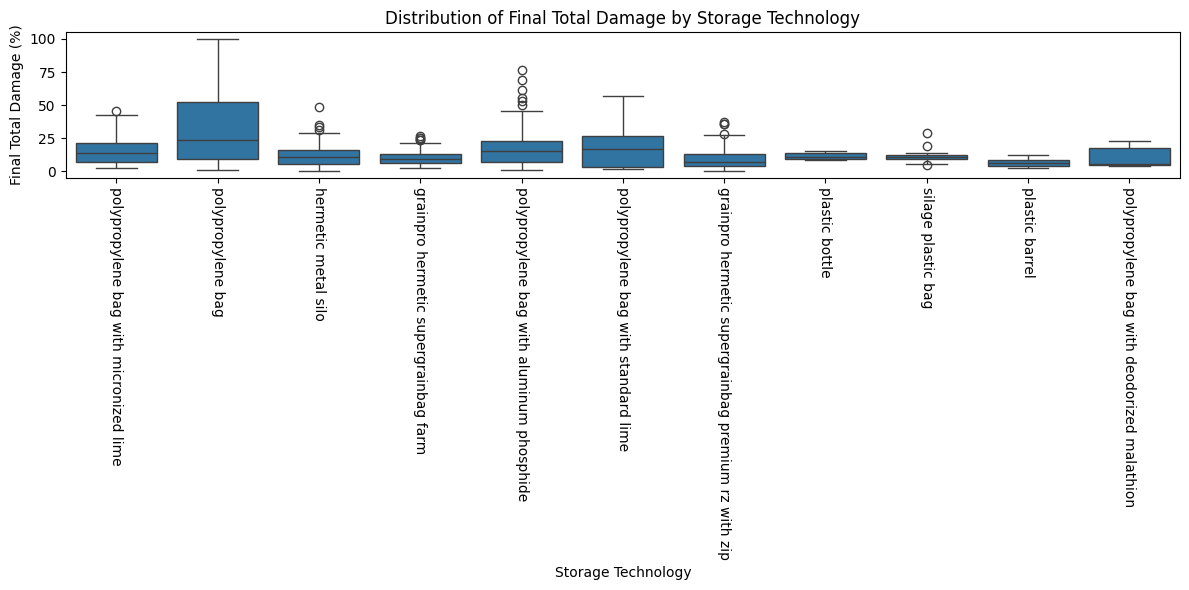

In [31]:
#  Boxplot: Final total damage by storage technology
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x='storage technology', y='final total damage  (%)')
plt.title("Distribution of Final Total Damage by Storage Technology")
plt.xlabel("Storage Technology")
plt.ylabel("Final Total Damage (%)")
plt.xticks(rotation=-90)
plt.tight_layout()
plt.show()

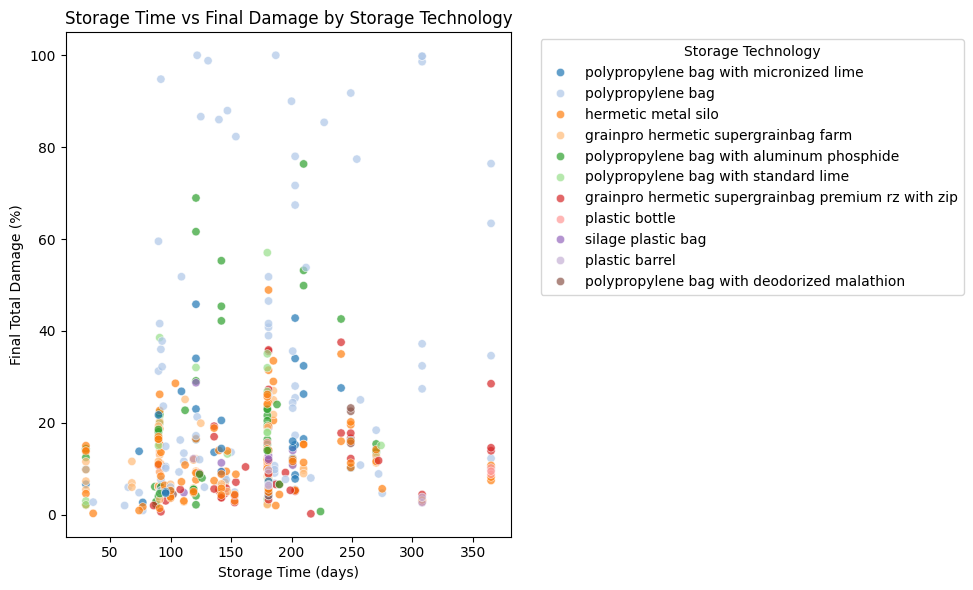

In [32]:
# Scatter: Storage time vs Final damage (colored by technology)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='storage time (days)', y='final total damage  (%)', hue='storage technology', alpha=0.7, palette='tab20')
plt.title("Storage Time vs Final Damage by Storage Technology")
plt.xlabel("Storage Time (days)")
plt.ylabel("Final Total Damage (%)")
plt.legend(title="Storage Technology", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

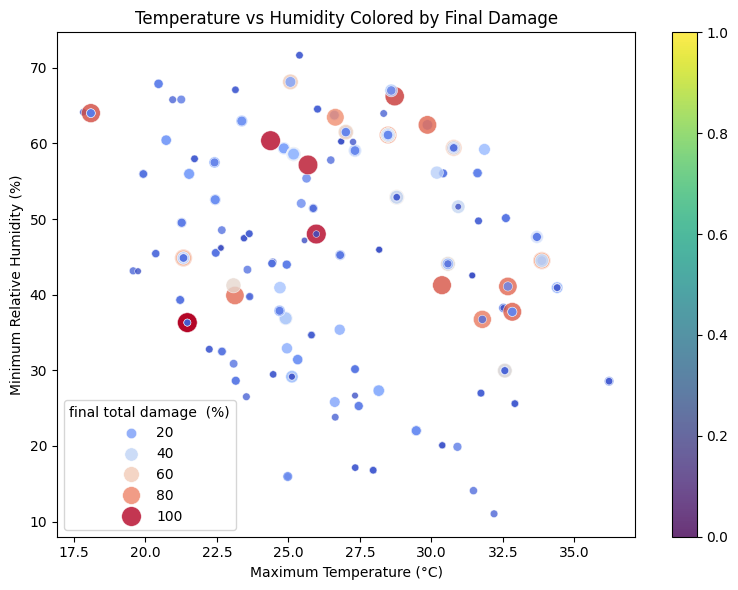

In [33]:
#  Temperature & Humidity vs Final Damage
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(data=df_clean, x='tmax (°c)', y='hrmin (%)', size='final total damage  (%)', hue='final total damage  (%)', palette='coolwarm', alpha=0.8, sizes=(20,200))
plt.title("Temperature vs Humidity Colored by Final Damage")
plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Minimum Relative Humidity (%)")
plt.colorbar(scatter.collections[0])
plt.tight_layout()
plt.show()

/tmp/ipython-input-1105990878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutual_info, y=mutual_info.index, palette="viridis")


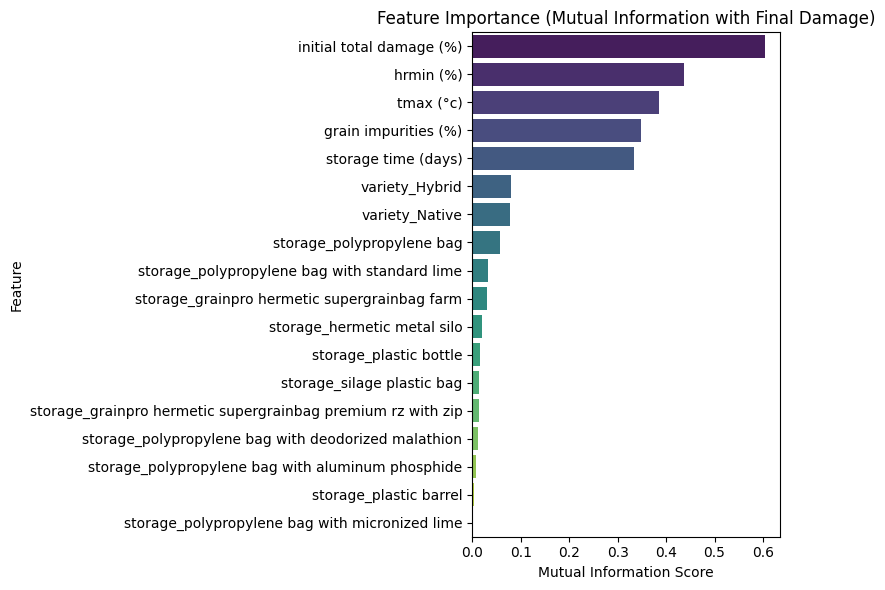

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=mutual_info, y=mutual_info.index, palette="viridis")
plt.title("Feature Importance (Mutual Information with Final Damage)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The data visualizations further confirm that the dataset is suitable for modeling but contains complex patterns that may not be captured by simple models such as linear regression. For example, the temperature and humidity versus final damage plots reveal overlapping classes and blurred boundaries between extreme conditions and their corresponding damage levels, indicating that relationships are not strictly linear. Similarly, the visualizations of storage technology and storage time against final damage show nuanced variations, suggesting that these features interact in non-trivial ways that simple models may struggle to learn effectively.

## Model Training

In the model training part, the approach will be to train different models and see which one tries to capture the complexities in our data. That will serve as the baseline model where the hyperparameters will be tuned to see if the metrics can be improved.

In [35]:
# Separating features and target
X = df_encoded.drop('final total damage  (%)', axis=1)
y = df_encoded['final total damage  (%)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (352, 18)
X_test shape: (88, 18)
y_train shape: (352,)
y_test shape: (88,)


### 1. Random Forest Model

In [36]:
# Instantiate the Random Forest Regressor
# Using random_state=42 for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


### 2. Linear Regression Model

In [37]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

### 3. Gradient Boosting Regressor

In [38]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

### 4. XGBoost Regressor

In [39]:
#   XGBoost Regressor
xgb = XGBRegressor(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

## Evaluating The Models

In [40]:
#  Evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f" {name}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  MSE:  {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.2f}")
    print("-"*40)
    return {"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [42]:
# Evaluate all models
results = []
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Gradient Boosting", y_test, y_pred_gbr))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))

# Make predictions for the Random Forest model
y_pred_rf = rf_model.predict(X_test)
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))

 Linear Regression
  MAE:  10.01
  MSE:  221.38
  RMSE: 14.88
  R²:   0.32
----------------------------------------
 Gradient Boosting
  MAE:  7.42
  MSE:  193.54
  RMSE: 13.91
  R²:   0.40
----------------------------------------
 XGBoost
  MAE:  6.88
  MSE:  179.10
  RMSE: 13.38
  R²:   0.45
----------------------------------------
 Random Forest
  MAE:  7.00
  MSE:  191.56
  RMSE: 13.84
  R²:   0.41
----------------------------------------


In [43]:
# Compare results
results_df = pd.DataFrame(results)
display(results_df)

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,10.005009,221.381168,14.878883,0.316441
1,Gradient Boosting,7.415853,193.538848,13.911824,0.402410
2,XGBoost,6.877239,179.097703,13.382739,0.447000
3,Random Forest,7.002813,191.557739,13.840439,0.408527


## Visualizing The Results

/tmp/ipython-input-3648444714.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


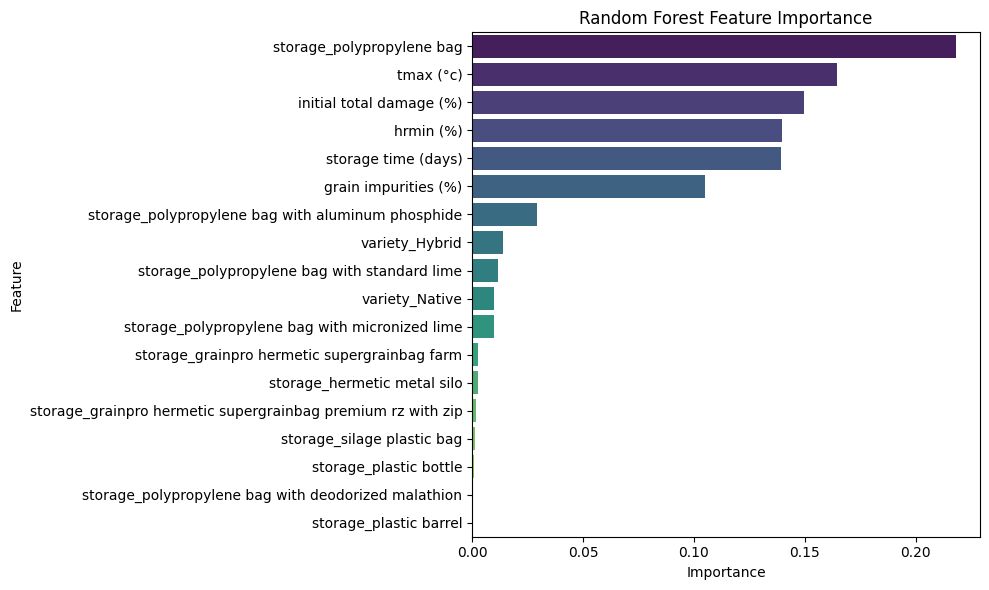

In [44]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Creating a pandas Series for better visualization
feature_importances = pd.Series(feature_importances, index=X_train.columns)

# Sorting the feature importances
feature_importances = feature_importances.sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show();

/tmp/ipython-input-4050537572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


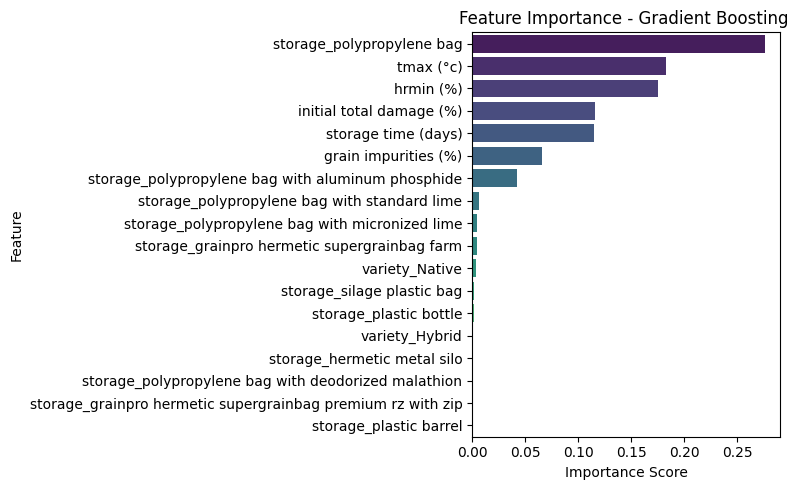

In [45]:
#  Gradient Boosting importances
gbr_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
gbr_importances = gbr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=gbr_importances,
    y=gbr_importances.index,
    palette="viridis"
)
plt.title("Feature Importance - Gradient Boosting ")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show();

/tmp/ipython-input-1374912674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


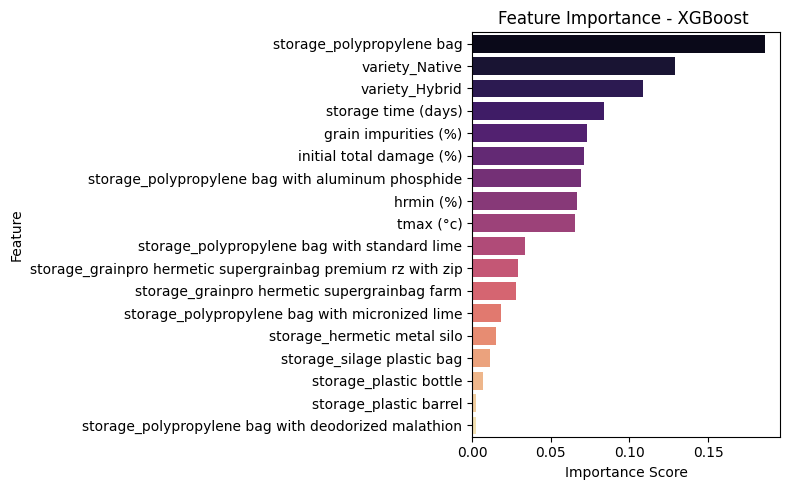

In [46]:
#  XGBoost importances
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=xgb_importances,
    y=xgb_importances.index,
    palette="magma"
)
plt.title("Feature Importance - XGBoost ")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Conclusion

The data exploration, visualization, and model training processes revealed that the dataset contains inherent complexities that can significantly influence the performance of the final predictive model. To establish a suitable baseline for optimization, multiple models were trained and evaluated using metrics such as R², RMSE, and MSE. Among them, the XGBoost model demonstrated the best ability to capture the underlying relationships in the data and was therefore selected for further tuning. These observed complexities likely stem from factors such as variations in data collection and sampling methods, as well as the inherently dynamic and interdependent nature of agricultural environments, where outcomes are rarely determined by a single factor.